In [1]:
!pip install transformers
!pip install accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 60.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 5.1 MB/s eta 0:00:00


In [69]:
from IPython.display import HTML
shell = get_ipython()

def adjust_font_size():
  display(HTML('''<style> 
    body {
      font-size: 20px;
    }
  '''))

if adjust_font_size not in shell.events.callbacks['pre_execute']:
  shell.events.register('pre_execute', adjust_font_size)

In [58]:
from transformers import ViTForImageClassification
from PIL import Image, ImageDraw, ImageFont
import numpy as np
from transformers import ViTFeatureExtractor
import torch
import matplotlib.pyplot as plt
import itertools
import io
import requests
from PIL import Image

In [5]:
vit = ViTForImageClassification.from_pretrained("oschamp/vit-artworkclassifier")
vit.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vit.to(device)

model_name_or_path = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

/usr/local/lib/python3.8/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [64]:
def logits_to_classes(sft_logits):
  logits_dict = {}
  for i in range(len(sft_logits)):
    prob = float(sft_logits[i])
    prob = round(prob, 2)
    # print(vit.config.id2label[i] + ": " + str(prob))

    logits_dict.update({vit.config.id2label[i]: prob})

  return logits_dict

def vit_classify_probs(image):
    encoding = feature_extractor(images=image, return_tensors="pt")
    encoding.keys()

    pixel_values = encoding['pixel_values'].to(device)

    outputs = vit(pixel_values)
    logits = outputs.logits

    # prediction = logits.argmax(-1)

    max_output = logits.softmax(-1)[0] #take the most likely classes of each N

    logdict = logits_to_classes(max_output)

    sorted_logs = dict(reversed(sorted(logdict.items(), key=lambda item: item[1])))

    s_logs = dict(itertools.islice(sorted_logs.items(), 5))
    for item in s_logs:
      print(item, str(s_logs[item]))
    print("\n\n")

In [75]:
def display_artwork(url):
    response = requests.get(url)
    image = Image.open(io.BytesIO(response.content))
    fig = plt.figure(figsize = (10,10))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

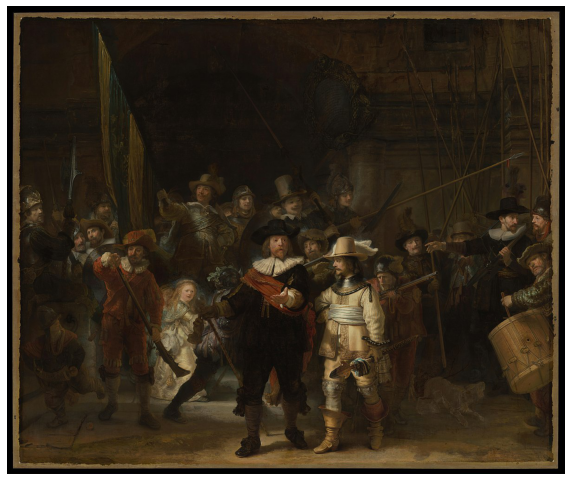

romanticism 0.64
baroque 0.2
realism 0.09
renaissance 0.03
surrealism 0.01





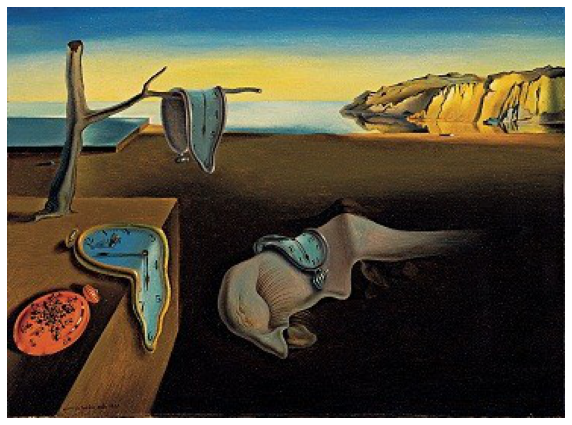

surrealism 0.9
expressionism 0.05
renaissance 0.01
post_impressionism 0.01
impressionism 0.01





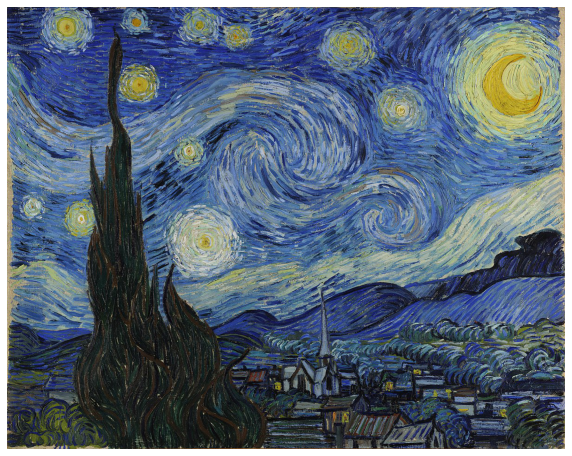

expressionism 0.4
art_nouveau 0.34
post_impressionism 0.19
surrealism 0.03
romanticism 0.01





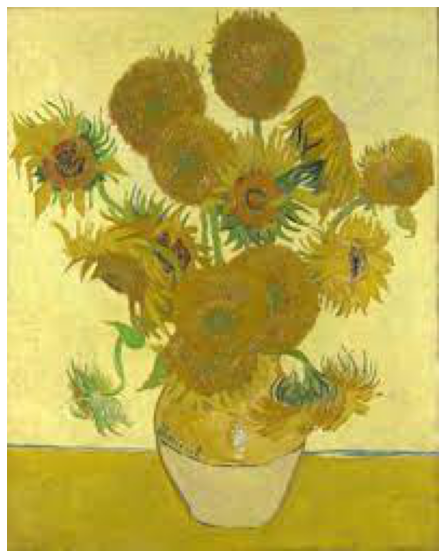

post_impressionism 0.65
impressionism 0.1
art_nouveau 0.09
expressionism 0.06
surrealism 0.04





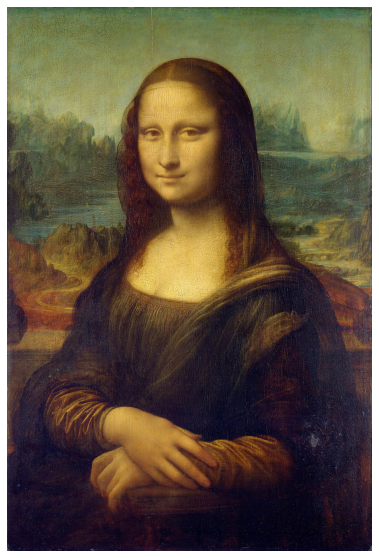

renaissance 0.88
baroque 0.07
romanticism 0.02
surrealism 0.01
realism 0.01





In [76]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/The_Night_Watch_-_HD.jpg/1200px-The_Night_Watch_-_HD.jpg'#
response = requests.get(url)
image = Image.open(io.BytesIO(response.content))
display_artwork(url)
vit_classify_probs(image)

url = 'https://upload.wikimedia.org/wikipedia/en/d/dd/The_Persistence_of_Memory.jpg'
response = requests.get(url)
image = Image.open(io.BytesIO(response.content))
display_artwork(url)
vit_classify_probs(image)

url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1200px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg'
response = requests.get(url)
image = Image.open(io.BytesIO(response.content))
display_artwork(url)
vit_classify_probs(image)

url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSrcChobVUdmY4bXKSMYUZ_L9HGvof-8Vt2xI6QTU69tqcEsayEj2z56gz78qPqKb0HTo0&usqp=CAU'
response = requests.get(url)
image = Image.open(io.BytesIO(response.content))
display_artwork(url)
vit_classify_probs(image)

url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg/1200px-Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg'
response = requests.get(url)
image = Image.open(io.BytesIO(response.content))
display_artwork(url)
vit_classify_probs(image)